In [10]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h3>Loading images

In [11]:
image_names= os.listdir('./Data_ML/image_chips/')
image_names[:5]#visualising top 5 image names

['H755.jpg', 'H396.jpg', '1J01.jpg', 'K360.jpg', '4H23.jpg']

In [12]:
from PIL import Image
im = Image.open(os.path.join(os.getcwd(),'Data_ML','image_chips',image_names[1]))
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x750 at 0x2B3D2319FB50>


<h3>Visualising the image

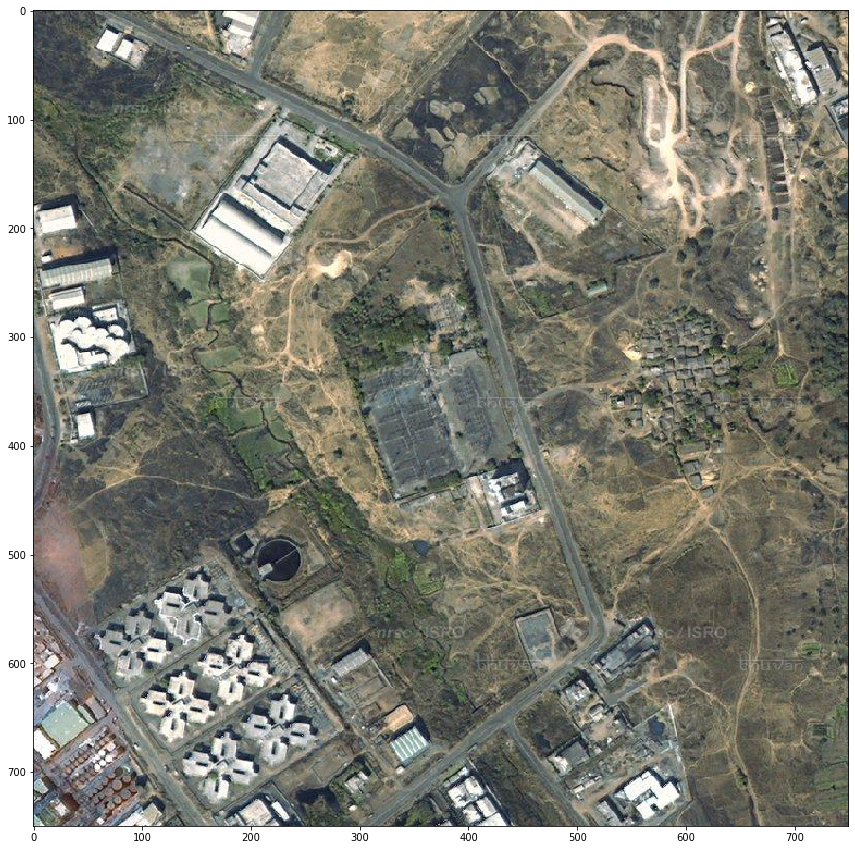

In [13]:
root = os.getcwd() #getting current working directory
idx = 12 #change idx to visualise different images from the image_names list
name = image_names[idx]
image_path = os.path.join(root,'Data_ML','image_chips',name)
img = plt.imread(image_path)
plt.imshow(img)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

<h3>Loading mask

In [14]:
mask_name = name[:-4] + '.csv' #removing .jpg from the name and adding .csv for reading mask
mask_path = os.path.join(root,'Data_ML','target_feature_AOI',mask_name)
mask_data = pd.read_csv(mask_path)
coordinates = mask_data.WKT.values[0][16:-3].split(',')

x = []
y = []

for c in coordinates:
    x.append(float(c.split(' ')[0]))
    y.append(float(c.split(' ')[1]))

x = np.array(x)
y = np.array(y)

Path(array([[ 302.42135762, -338.49337748],
       [ 354.5736755 , -332.4089404 ],
       [ 358.91970199, -347.18543046],
       [ 361.52731788, -352.40066225],
       [ 362.39652318, -355.87748344],
       [ 364.13493377, -360.22350993],
       [ 368.48096026, -361.96192053],
       [ 371.95778146, -362.83112583],
       [ 372.82698675, -362.83112583],
       [ 375.43460265, -363.70033113],
       [ 390.21109272, -420.1986755 ],
       [ 333.71274834, -443.66721854],
       [ 302.42135762, -338.49337748]]), None)
(562500, 2)
[[   0    0]
 [   1    0]
 [   2    0]
 ...
 [ 747 -749]
 [ 748 -749]
 [ 749 -749]]
5945


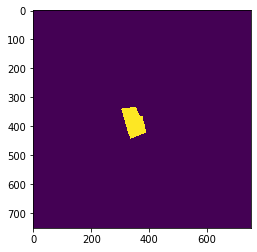

In [6]:
from matplotlib.path import Path
points = ([tuple(float(i) for i in x.split()) for x in coordinates])
h , w = 750, 750
point_path = Path(points)
print(point_path)
x, y = np.mgrid[:h, :w]
x =  -x

coors=np.array(list(map(lambda a : (a[1],a[0]),(np.hstack((x.reshape(-1, 1), y.reshape(-1,1)))))))
print(coors.shape)
masked_image = point_path.contains_points(coors)
print(coors)
print(sum(masked_image))
masked_image = masked_image.reshape(h,w)
plt.imshow(masked_image)
plt.show()


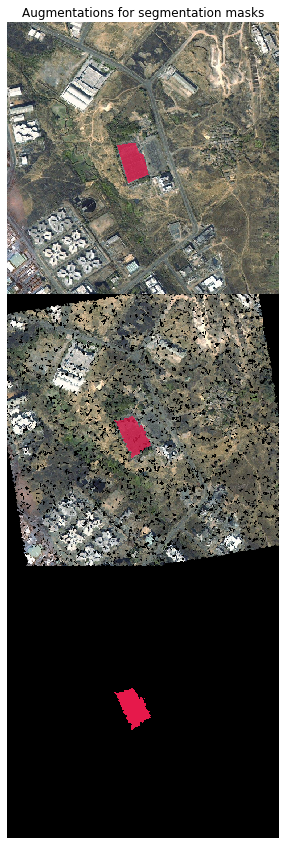

In [7]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage
segmap = SegmentationMapsOnImage(masked_image, shape=masked_image.shape)
image = img
image_aug, segmap_aug = iaa.Sequential([
            iaa.CoarseDropout(0.1, size_percent=0.2),
            iaa.Affine(rotate=(-30, 30)),
            iaa.ElasticTransformation(alpha=20, sigma=2)
        ])(image=img, segmentation_maps=segmap)
side_by_side = np.hstack([
    segmap.draw_on_image(image),
    segmap_aug.draw_on_image(image_aug),  # show blend of (augmented) image and segmentation map
    segmap_aug.draw()  # show only the augmented segmentation map
]).reshape((750*3,750,3))

fig, ax = plt.subplots(figsize=(10, 15))
ax.axis('off')
plt.title('Augmentations for segmentation masks')
ax.imshow(side_by_side)

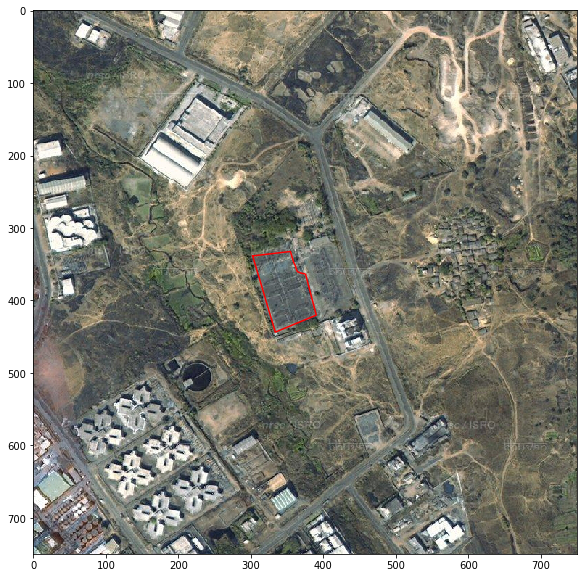

In [15]:
plt.imshow(img)
plt.plot(x,-y,c='r')# plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()